<a href="https://colab.research.google.com/github/kajol16/Sentiment_analysis/blob/main/Movie_review_analysis_using_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To show the most common words in a wordcloud

In [17]:
!pip install wordcloud

Import Required libraries

In [34]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from google.colab import drive
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
from bs4 import BeautifulSoup
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

%matplotlib inline

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

importing the data set from google drive

In [35]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


Reading the imported data and storing it in imdb_data

In [36]:
imdb_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/imdb_labelled.txt", delimiter="\t")

Lets check the content of the imported file

In [37]:
imdb_data.head()

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


Lets see how the data distribution looks like initially.

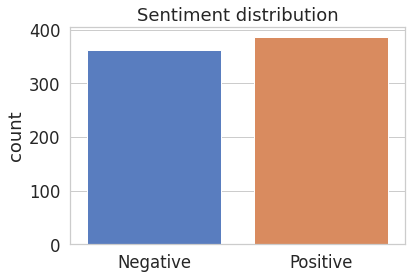

In [38]:
Sentiment_visual = sns.countplot(x='Sentiment', data=imdb_data)
Sentiment_visual.set_title("Sentiment distribution")
Sentiment_visual.set_xticklabels(['Negative', 'Positive'])
plt.xlabel("");

Splitting data into test dataset and train dataset and development dataset

In [39]:
imdb_train, imdb_test = train_test_split(imdb_data,test_size=0.2)
imdb_train, imdb_dev = train_test_split(imdb_train,test_size=0.25)

Lets see how the data distribution looks like in training data set

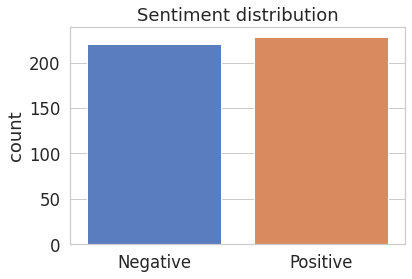

In [40]:
Sentiment_visual = sns.countplot(x='Sentiment', data=imdb_train)
Sentiment_visual.set_title("Sentiment distribution")
Sentiment_visual.set_xticklabels(['Negative', 'Positive'])
plt.xlabel("");

What are the most common words?

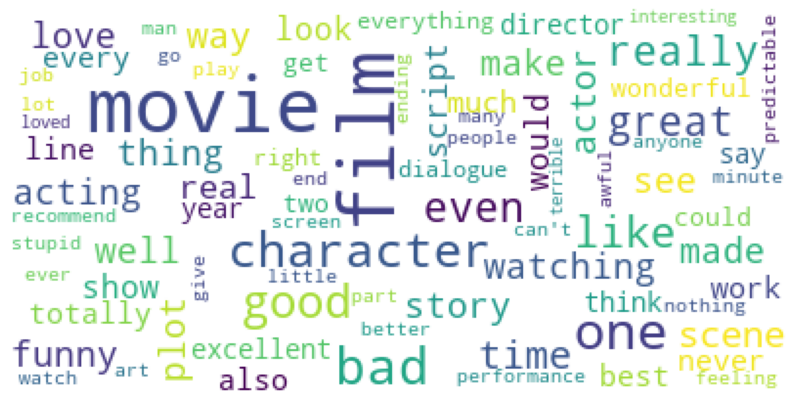

In [52]:
text = " ".join(Review for Review in imdb_train.Review)


wordcloud = WordCloud(max_font_size=40, max_words=80, background_color="white", stopwords=stopwords.words("english")).generate(text)
plt.figure(figsize=[14,8])
plt.imshow(wordcloud)
plt.axis("off")
plt.show();